# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()
display(data.head())
display(data.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


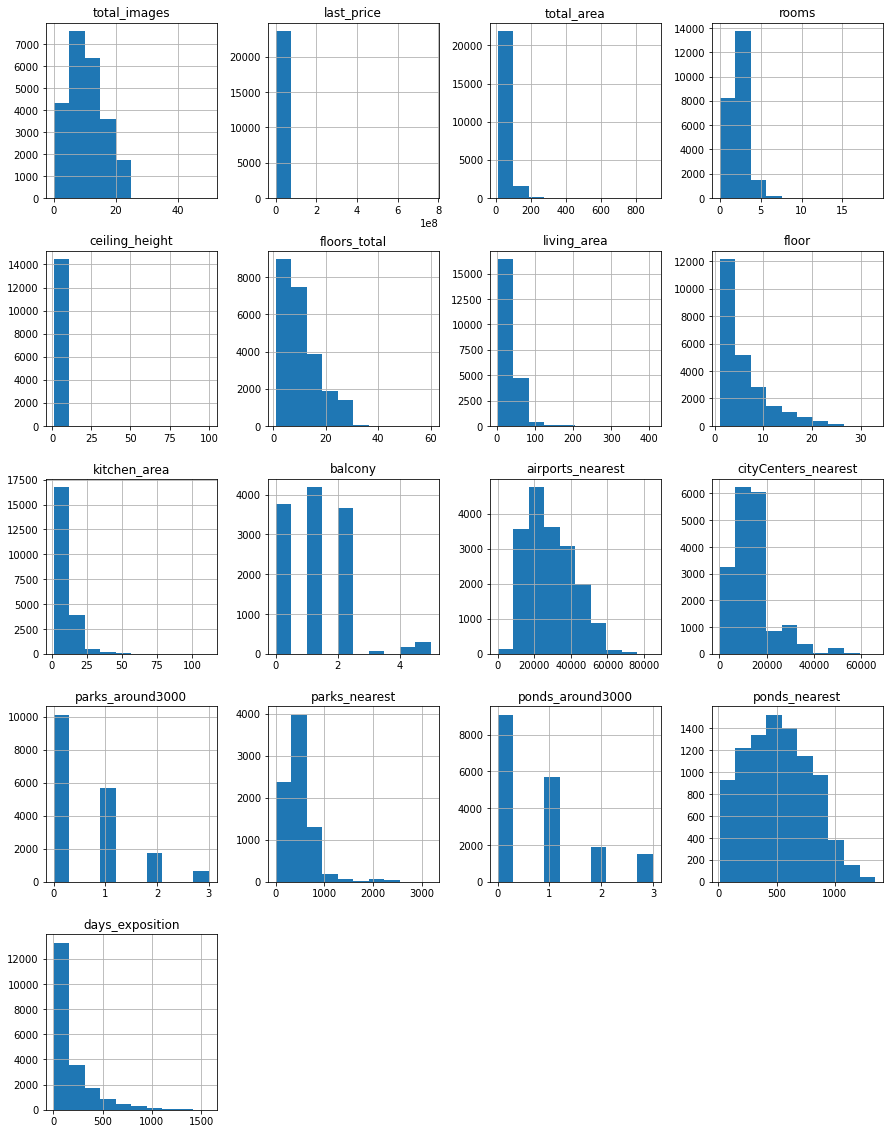

In [2]:
data.hist(figsize=(15, 20))
plt.show()

Видно что требуется изменение типов данных для некоторых столбцов, а также работа с пропусками и выбрасами. Также стоит проверить на полные дупликаты таблицу. 

### Предобработка данных

Из общих данных о датасете, в столбцах: 
* ceiling_height,
* floors_total,
* living_area,
* is_apartment,
* kitchen_area,
* balcony,
* locality_name,
* airports_nearest,
* parks_around3000,
* parks_nearest,
* ponds_around3000,
* ponds_nearest,
* days_exposition

содержаться пропуски.

**Столбец ceiling_height**

Столбец ceiling_height содержит пропуски, которые появились из-за того что клиент забыл указать или возможно не смог измерить высоту в случае, например, мансарды

Посмотрим на уникальные значения высоты потолков, перед тем как заполнить пропуски

In [3]:
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Данные явно имеют ошибку, например высоты 25 и 100 метров, скорее всего имелось ввиду 2.5 и 10.0 метров. Заменим эти данные

In [4]:
for d in data['ceiling_height'].sort_values().unique():
    if d > 9:
        data.loc[(data['ceiling_height'] == d), 'ceiling_height'] = data.loc[(data['ceiling_height'] == d), 'ceiling_height'] / 10 

Их единицы и если это ошибки, то их количество говорит нам, что это выбросы. Теперь можно заменить пропуски медианным значением. Но расчитывать стоить только среди домов с одинаковым количеством этажей, так как скорее всего имеют стандартную планировку.

In [42]:
for ft in data['floors_total'].dropna().unique():
    data.loc[(data['floors_total'] == ft)&(data['ceiling_height'].isna()), 'ceiling_height'] = data[data['floors_total'] == ft]['ceiling_height'].dropna().median()

**Столбец floors_total**

Всего пропущено значений в floors_total в 86 строках. Но если заменить их на медианное значение может ли получиться так, что общее количество этажей в здании меньше указаного этажа квартиры в объявлении?

In [6]:
print('медианное значение общего количества этажей:', data['floors_total'].median())
data[(data['floors_total'].isna()) & (data['floor'] > data['floors_total'].median())][['floor', 'floors_total']].count()

медианное значение общего количества этажей: 9.0


floor           37
floors_total     0
dtype: int64

В 37 случаях из 86 - этаж квартиры будет выше последнего этажа здания, что конечно же быть не может. Потому оставим столбец без изменений. 

**Столбец living_area**

Столбец living_area содержит пропуски, которые появились из-за того что клиент забыл указать или возможно не смог измерить площадь. Пропуски заменим медианным значением, внутри группы зданий с одинаковым количеством комнат в квартире.

<AxesSubplot:>

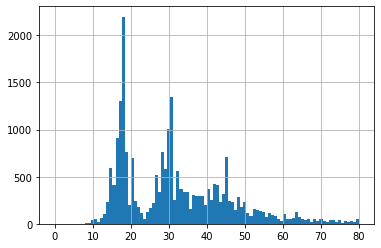

In [7]:
for r in data['rooms'].dropna().unique():
    data.loc[(data['rooms'] == r)&(data['living_area'].isna()), 'living_area'] = data[data['rooms'] == r]['living_area'].median()
    
data['living_area'].hist(bins=100, range=(0, 80))

**Столбец is_apartment**

Обычно так как апартаменты - это не жилые помещения, то пропуски в этом столбце скорее всего говорят о том, что это не апартаменты, то есть в столбце стоит указать булевое значение False. Но перед этим нужно изменить тип данных столбца из строкового в булево.

In [8]:
data.loc[data['is_apartment'].isna(), 'is_apartment'] = 'False'

**Столбец kitchen_area**

Столбец kitchen_area содержит пропуски, которые появились из-за того что клиент забыл указать или возможно не смог измерить площадь, или кухня совмещена с гостиной. Пропуски заменим медианным значением.

<AxesSubplot:>

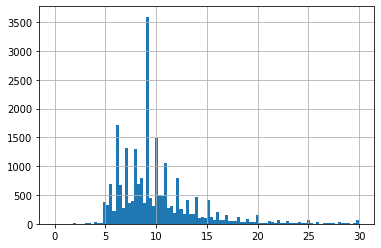

In [9]:
data.loc[(data['kitchen_area'].isna()), 'kitchen_area'] = data['kitchen_area'].median()

for r in data['rooms'].dropna().unique():
    data.loc[(data['rooms'] == r)&(data['kitchen_area'].isna()), 'kitchen_area'] = data[data['rooms'] == r]['kitchen_area'].median()
    
data['kitchen_area'].hist(bins=100, range=(0, 30))

**Столбец balcony**

Пропуски в этом столбце скорее всего означают что балкон отстутвует, так что заменим пропуски на 0.

In [10]:
data.loc[(data['balcony'].isna()), 'balcony'] = 0

**Столбцы parks_around3000 и ponds_around3000**

Пропуски в этих столбцах скорее всего означают что парки/пруды отстутвуют, так что заменим пропуски на 0.

In [11]:
data.loc[(data['parks_around3000'].isna()), 'parks_around3000'] = 0
data.loc[(data['ponds_around3000'].isna()), 'ponds_around3000'] = 0

**Столбец days_exposition**

Возможно продажа была совершена в тот же день и поэтому значение ничем не заполнили. Заменим пропуски нулями.

In [12]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['year_of_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year
data['days_exposition'].isna().sum()
for y in data['year_of_exposition'].unique():
    print(y, data[data['year_of_exposition'] == y]['days_exposition'].isna().sum())

2019 1796
2018 959
2015 70
2017 271
2016 67
2014 18


Большинство пропусков находятся в 2019 году, видимо это связано с тем что объявление все ещё ожидает продажи и заполнять столбец days_exposition поле не стоит

**Столбец locality_name**

Посмотрим этот столбец на неявные дубликаты. Для начало видно, что есть дубликаты связанные с буквой "ё" и названием ПГТ.  

In [13]:
for i in data['locality_name'].dropna().sort_values().unique():
    i_new = i.replace('поселок', 'посёлок')
    data['locality_name'] = data['locality_name'].replace(i, i_new)
    
for i in data['locality_name'].dropna().sort_values().unique():    
    i_new = i.replace('городской посёлок', 'посёлок городского типа')
    data['locality_name'] = data['locality_name'].replace(i, i_new)

Посмотрим на количество дубликатов слов в названиях населенных пунктов

In [14]:
import nltk
words = {}
for i in data['locality_name'].dropna().sort_values().unique():
    for j in nltk.word_tokenize(i):
        if j not in words.keys():
            words[j] = 1
        else:
            words[j] += 1
    
print({k: v for k, v in sorted(words.items(), key=lambda item: item[1])})

{'Бокситогорск': 1, 'Волосово': 1, 'Волхов': 1, 'Всеволожск': 1, 'Выборг': 1, 'Высоцк': 1, 'Гатчина': 1, 'Зеленогорск': 1, 'Ивангород': 1, 'Каменногорск': 1, 'Кингисепп': 1, 'Кириши': 1, 'Кировск': 1, 'Колпино': 1, 'Коммунар': 1, 'Красное': 1, 'Село': 1, 'Кронштадт': 1, 'Лодейное': 1, 'Поле': 1, 'Ломоносов': 1, 'Луга': 1, 'Отрадное': 1, 'Павловск': 1, 'Петергоф': 1, 'Пикалёво': 1, 'Подпорожье': 1, 'Приморск': 1, 'Приозерск': 1, 'Пушкин': 1, 'Санкт-Петербург': 1, 'Светогорск': 1, 'Сертолово': 1, 'Сестрорецк': 1, 'Сланцы': 1, 'Сосновый': 1, 'Сясьстрой': 1, 'Тихвин': 1, 'Тосно': 1, 'Шлиссельбург': 1, 'Агалатово': 1, 'Аро': 1, 'Батово': 1, 'Белогорка': 1, 'Вруда': 1, 'Пустомержа': 1, 'Большие': 1, 'Большое': 1, 'Рейзино': 1, 'Большой': 1, 'Сабск': 1, 'Борисова': 1, 'Грива': 1, 'Ваганово': 1, 'Вартемяги': 1, 'Вахнова': 1, 'Кара': 1, 'Выскатка': 1, 'Глинка': 1, 'Горбунки': 1, 'Гостилицы': 1, 'Заклинье': 1, 'Заневка': 1, 'Извара': 1, 'Иссад': 1, 'Кальтино': 1, 'Камышовка': 1, 'Каськово': 1, '

Выделим названия, которые упоминаются больше 1 раза:

In [15]:
list_duplicates = ['Кудрово', 'Любань', 'Мурино', 'Никольское', 'Новая', 'Ладога', 'Фёдоровское', 'Бегуницы',
                   'Колпаны', 'Гарболово', 'Зимитицы', 'Калитино', 'Романовка', 'Малое', 'Рабитицы', 'Щеглово', 
                   'Лесное', 'Громово', 'Красная', 'Новый', 'Ропша', 'Рябово', 'Горка', 'Приладожский', 'Рахья',
                   'железнодорожной', 'Вещево', 'Приветнинское', 'Павлово', 'Бор'
                  ]
            
for j in list_duplicates:
    print(j)
    print('---')
    duplicates = []
    for i in data['locality_name'].dropna().unique():
        if j in nltk.word_tokenize(i):
            duplicates.append(i)
    
    if len(duplicates) > 1: print(duplicates)
    print('---')

Кудрово
---
['деревня Кудрово', 'Кудрово']
---
Любань
---
['Любань', 'посёлок Любань']
---
Мурино
---
['посёлок Мурино', 'Мурино']
---
Никольское
---
['Никольское', 'село Никольское']
---
Новая
---
['садовое товарищество Новая Ропша', 'Новая Ладога']
---
Ладога
---
['Новая Ладога', 'село Старая Ладога']
---
Фёдоровское
---
['деревня Фёдоровское', 'посёлок городского типа Фёдоровское']
---
Бегуницы
---
['деревня Бегуницы', 'деревня Старые Бегуницы']
---
Колпаны
---
['деревня Большие Колпаны', 'деревня Малые Колпаны']
---
Гарболово
---
['деревня Гарболово', 'посёлок Гарболово']
---
Зимитицы
---
['посёлок Зимитицы', 'деревня Зимитицы']
---
Калитино
---
['деревня Калитино', 'посёлок Калитино']
---
Романовка
---
['посёлок Романовка', 'деревня Малая Романовка']
---
Малое
---
['деревня Малое Карлино', 'деревня Малое Верево']
---
Рабитицы
---
['деревня Рабитицы', 'посёлок Рабитицы']
---
Щеглово
---
['посёлок Щеглово', 'деревня Щеглово']
---
Лесное
---
['посёлок Лесное', 'коттеджный посёлок Лес

Теперь надо пройтись по яндекс.картам и уточнить каждый пункт неявных повторов:
деревня Кудрово и Кудрово - Деревня Кудрово - это прежнее название
посёлок Мурино и Мурино' - Это просто Мурино
деревня Фёдоровское и посёлок городского типа Фёдоровское - это поселок
деревня Гарболово и посёлок Гарболово - это деревня

In [16]:
data['locality_name'] = data['locality_name'].replace('деревня Кудрово', 'Кудрово')
data['locality_name'] = data['locality_name'].replace('посёлок Мурино', 'Мурино')
data['locality_name'] = data['locality_name'].replace('деревня Фёдоровское', 'посёлок городского типа Фёдоровское')
data['locality_name'] = data['locality_name'].replace('посёлок Гарболово', 'деревня Гарболово')

**Столбцы airports_nearest, cityCenters_nearest**

Пропуски могут связаны с техническими ошибками. Заменим данные медианными значениями при выборки одинаковых населенных пунктов.

In [17]:
for city in data['locality_name'].dropna().unique():
    data.loc[(data['airports_nearest'].isna()&(data['locality_name'] == city)), 'airports_nearest'] = data[data['locality_name'] == city]['airports_nearest'].dropna().median()
    data.loc[(data['cityCenters_nearest'].isna()&(data['locality_name'] == city)), 'cityCenters_nearest'] = data[data['locality_name'] == city]['cityCenters_nearest'].dropna().median()

**Изменение типа данных**

Из общих данных о датасете, необходимо изменить тип данных следующих столбцов:
* first_day_exposition в date_time, так как тут указана дата,
* floors_total в int, количество этажей - это категориальная характеристика,
* last_price в int, врядтли при покупки квартиры в цене бывают указаны копейки,
* is_apartment в bool, тут два варианта либо да, либо нет, соответственно это булев тип данных, 
* balcony в int, количество балконов - это категориальная характеристика,
* parks_around3000 в int, количество парков - это категориальная характеристика, 
* ponds_around3000 в int, количество прудов - это категориальная характеристика,
* days_exposition в int, количество дней может быть и например 2,5, но чаще всего округляют до целого числа. 

In [18]:
#data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['floors_total'] = data['floors_total'].dropna().astype('int')
data['last_price'] = data['last_price'].dropna().astype('int')
data['is_apartment'] = data['is_apartment'].astype('bool')
data['balcony'] = data['balcony'].dropna().astype('int')
data['parks_around3000'] = data['parks_around3000'].dropna().astype('int')
data['ponds_around3000'] = data['ponds_around3000'].dropna().astype('int')
data['days_exposition'] = np.ceil(data['days_exposition']).dropna().astype('int')

**Удаление выбросов из данных**

Посмотрим на столбец total_area

In [19]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'year_of_exposition'],
      dtype='object')

In [20]:
data['filtred'] = True

columns = ['last_price', 'total_area', 'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'kitchen_area', 'balcony', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'
          ]
for col in columns:
    name = col+'_filtred'
    data[name] = True
    q1 = data[col].quantile(0.25)                 
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    data.loc[(data[col] <= q1-1.5*iqr) | (data[col] >= q3+1.5*iqr), ['filtred', name]] = False
    
print(len(data[data['filtred']==True]) / 23699)

0.6445419637959408


Проведена предобработка данных, изменены типы данных, заполнены пропуски (где это возможно). Добавлен столбец filtred который отсекает аномальные значения. В нашем датасете их 64%. 

### Посчитайте и добавьте в таблицу новые столбцы

In [21]:
data['price_per_square_meter'] = data['last_price'] / data['living_area']
data['day_of_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).dayofweek
data['month_of_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month
#data['year_of_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year

data['floor_type'] = 'неопределено'

data.loc[(data['floor'] == data['floors_total']), 'floor_type'] = 'последний'
data.loc[(data['floor'] != data['floors_total']), 'floor_type'] = 'другой'
data.loc[(data['floor'] == 1), 'floor_type'] = 'первый'
        
data['cityCenters_nearest_km'] = np.ceil(data['cityCenters_nearest'].dropna() / 1000).astype('int')
data['cityCenters_nearest_km'].head(30)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   total_images                 23699 non-null  int64         
 1   last_price                   23699 non-null  int64         
 2   total_area                   23699 non-null  float64       
 3   first_day_exposition         23699 non-null  datetime64[ns]
 4   rooms                        23699 non-null  int64         
 5   ceiling_height               23621 non-null  float64       
 6   floors_total                 23613 non-null  float64       
 7   living_area                  23699 non-null  float64       
 8   floor                        23699 non-null  int64         
 9   is_apartment                 23699 non-null  bool          
 10  studio                       23699 non-null  bool          
 11  open_plan                    23699 non-nu

Добавлены соответствующие столбцы для дальнейшего анализа.

### Проведите исследовательский анализ данных

Изучим следующий параметр total_area:

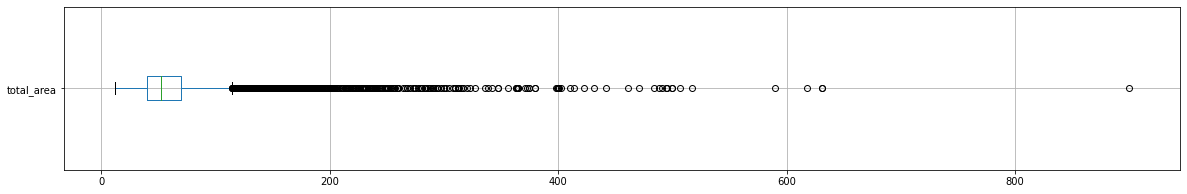

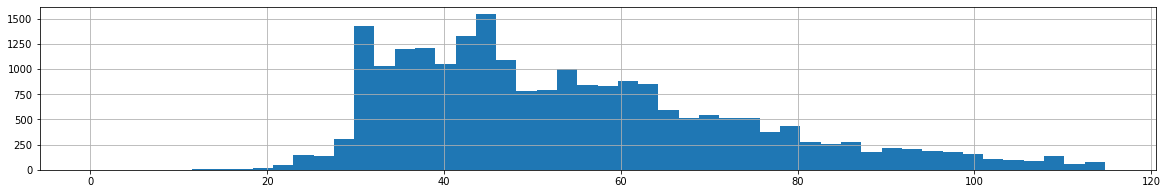

Среднее значение неотфильтрованных данных столбца total_area 60.34865099793241
Медианное значение неотфильтрованных данных столбца total_area 52.0
Среднее значение отфильтрованных данных столбца total_area 54.364906718910014
Медианное значение отфильтрованных данных столбца total_area 50.1
Среднее значение отфильтрованных по всем столбцам данных столбца total_area 50.56525368248772
Медианное значение отфильтрованных по всем столбцам данных столбца total_area 46.8


In [22]:
def describe(column):
    data.boxplot(column=column, rot=0, figsize=(20, 3), vert=False)
    plt.show()
    q1 = data[column].quantile(0.25)                 
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    data[column].hist(bins=50, figsize=(20, 3), range=(0, q3+1.5*iqr))
    plt.show()
    print('Среднее значение неотфильтрованных данных столбца', column, data[column].mean())
    print('Медианное значение неотфильтрованных данных столбца', column, data[column].median())
    print('Среднее значение отфильтрованных данных столбца', column, data[data[column + '_filtred'] == True][column].mean())
    print('Медианное значение отфильтрованных данных столбца', column, data[data[column + '_filtred'] == True][column].median())
    print('Среднее значение отфильтрованных по всем столбцам данных столбца', column, data[data['filtred'] == True][column].mean())
    print('Медианное значение отфильтрованных по всем столбцам данных столбца', column, data[data['filtred'] == True][column].median())

describe('total_area')

Большой росто значений в районе 30 квадратных метров (площадь 1-комнатной квартиры), медиана в 46 квадратных метрах и постепеное уменьшение при увеличении площади.

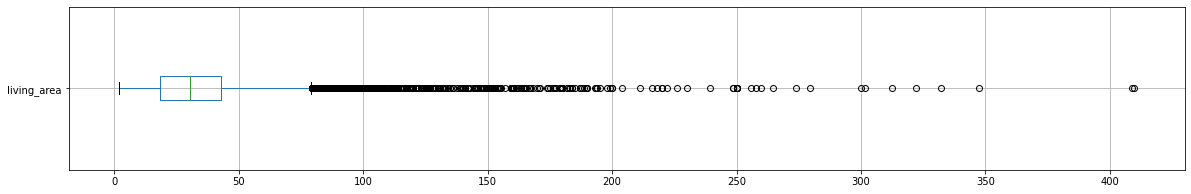

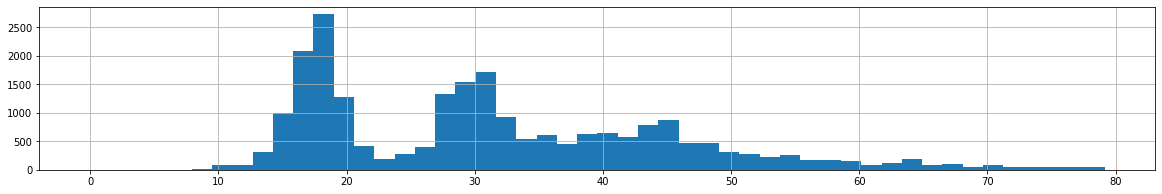

Среднее значение неотфильтрованных данных столбца living_area 34.32198158200768
Медианное значение неотфильтрованных данных столбца living_area 30.3
Среднее значение отфильтрованных данных столбца living_area 31.58302258102801
Медианное значение отфильтрованных данных столбца living_area 30.0
Среднее значение отфильтрованных по всем столбцам данных столбца living_area 29.226068838625203
Медианное значение отфильтрованных по всем столбцам данных столбца living_area 29.0


In [23]:
describe('living_area')

На графике мы видим 2 пика - это площадь 1- и 2- комнатных квартир.

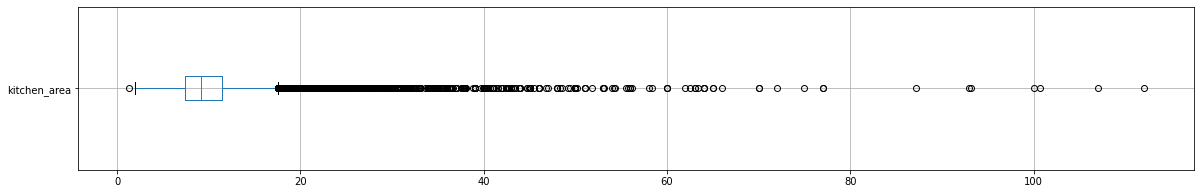

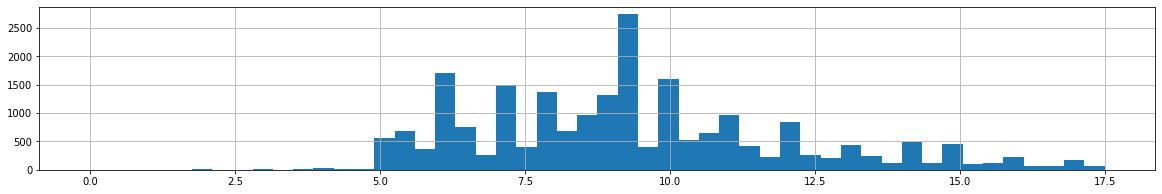

Среднее значение неотфильтрованных данных столбца kitchen_area 10.4285260981476
Медианное значение неотфильтрованных данных столбца kitchen_area 9.1
Среднее значение отфильтрованных данных столбца kitchen_area 9.307276428280636
Медианное значение отфильтрованных данных столбца kitchen_area 9.1
Среднее значение отфильтрованных по всем столбцам данных столбца kitchen_area 8.934014402618658
Медианное значение отфильтрованных по всем столбцам данных столбца kitchen_area 9.0


In [24]:
describe('kitchen_area')

В большинстве предложений кухня площадью - 9,1 квадротных метров.

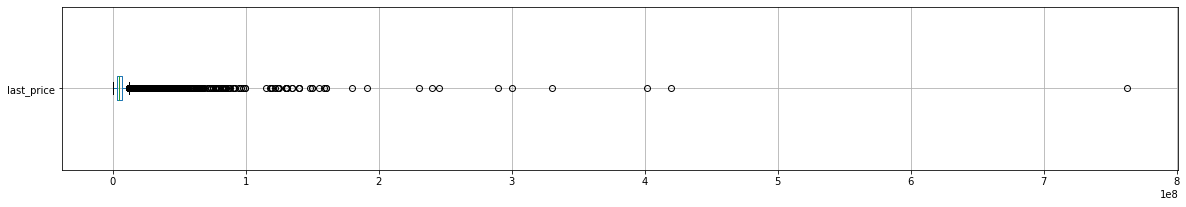

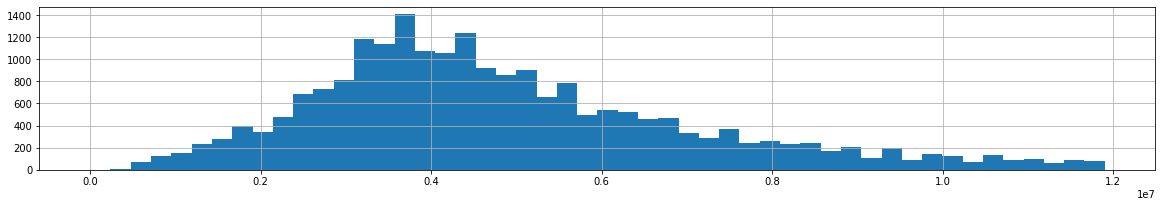

Среднее значение неотфильтрованных данных столбца last_price 6541548.771551542
Медианное значение неотфильтрованных данных столбца last_price 4650000.0
Среднее значение отфильтрованных данных столбца last_price 4839969.752611147
Медианное значение отфильтрованных данных столбца last_price 4400000.0
Среднее значение отфильтрованных по всем столбцам данных столбца last_price 4497753.375908347
Медианное значение отфильтрованных по всем столбцам данных столбца last_price 4200000.0


In [25]:
describe('last_price')

Нормальное распределение, медианное значние 4,4 миллиона рублей.

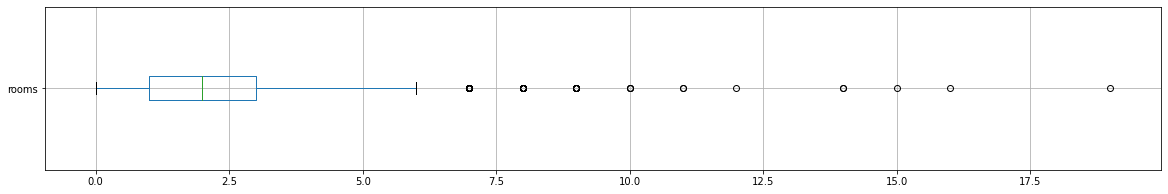

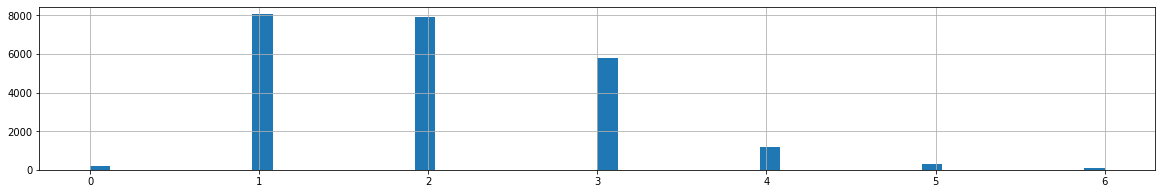

Среднее значение неотфильтрованных данных столбца rooms 2.070635891809781
Медианное значение неотфильтрованных данных столбца rooms 2.0
Среднее значение отфильтрованных данных столбца rooms 2.0302501701837987
Медианное значение отфильтрованных данных столбца rooms 2.0
Среднее значение отфильтрованных по всем столбцам данных столбца rooms 1.8729296235679214
Медианное значение отфильтрованных по всем столбцам данных столбца rooms 2.0


In [26]:
describe('rooms')

Большинство предложений это 1- 2- и 3-комнатные квартиры.

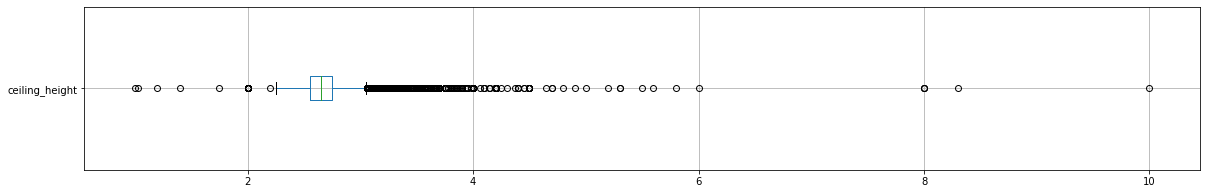

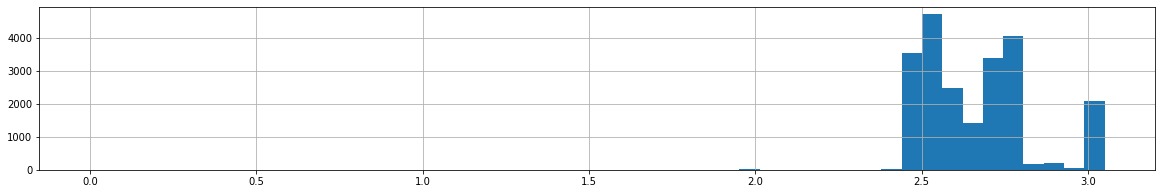

Среднее значение неотфильтрованных данных столбца ceiling_height 2.708770162143855
Медианное значение неотфильтрованных данных столбца ceiling_height 2.65
Среднее значение отфильтрованных данных столбца ceiling_height 2.6654488856807723
Медианное значение отфильтрованных данных столбца ceiling_height 2.65
Среднее значение отфильтрованных по всем столбцам данных столбца ceiling_height 2.644211977935382
Медианное значение отфильтрованных по всем столбцам данных столбца ceiling_height 2.6


In [27]:
describe('ceiling_height')

Пики в значениях 2,5 метра (хрущевская пятиэтажка) и 2,65 (сталинская 9 этажка)

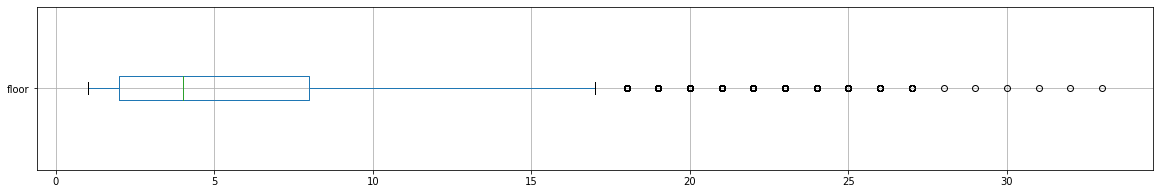

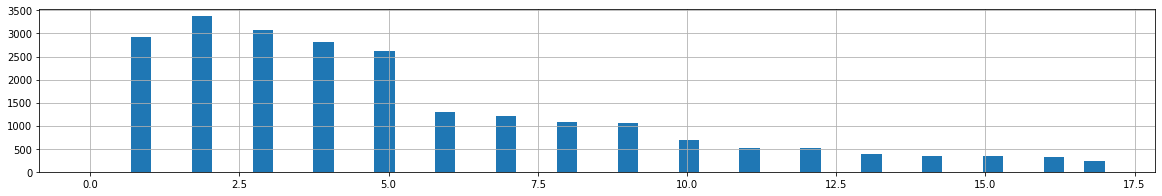

Среднее значение неотфильтрованных данных столбца floor 5.892358327355584
Медианное значение неотфильтрованных данных столбца floor 4.0
Среднее значение отфильтрованных данных столбца floor 5.16350332594235
Медианное значение отфильтрованных данных столбца floor 4.0
Среднее значение отфильтрованных по всем столбцам данных столбца floor 5.356726677577742
Медианное значение отфильтрованных по всем столбцам данных столбца floor 4.0


In [28]:
describe('floor')

Большинство значений соответствует 1-5 этажу, потом ступенька до 9 этажа. Большинство предложений стандартные 5 и 9 этажки

<AxesSubplot:>

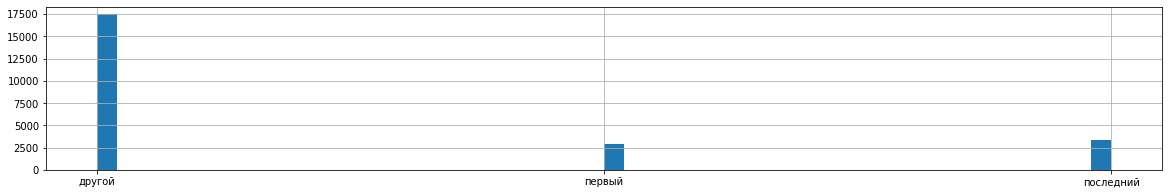

In [29]:
data['floor_type'].hist(bins=50, figsize=(20, 3))

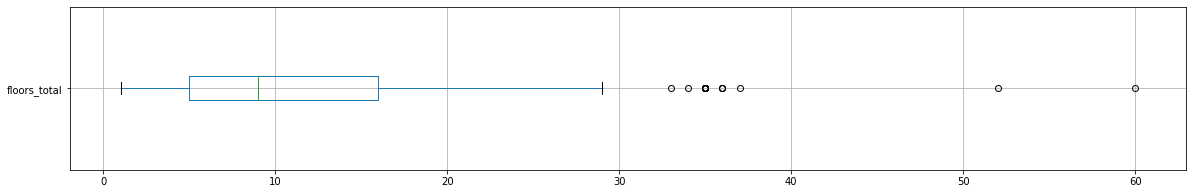

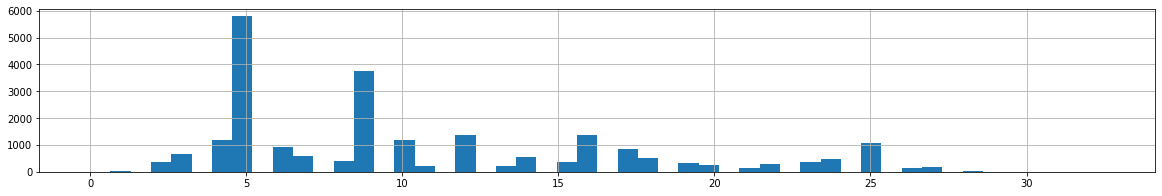

Среднее значение неотфильтрованных данных столбца floors_total 10.67382374115953
Медианное значение неотфильтрованных данных столбца floors_total 9.0
Среднее значение отфильтрованных данных столбца floors_total 10.638946609558543
Медианное значение отфильтрованных данных столбца floors_total 9.0
Среднее значение отфильтрованных по всем столбцам данных столбца floors_total 10.611742299862087
Медианное значение отфильтрованных по всем столбцам данных столбца floors_total 9.0


In [30]:
describe('floors_total')

Большинство предложений - пятиэтажки, далее девяти этажки, потом двенадцатиэтажки, потом 16- и 24- этажные здания

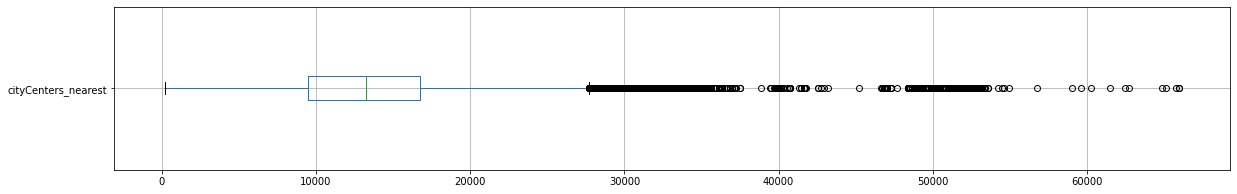

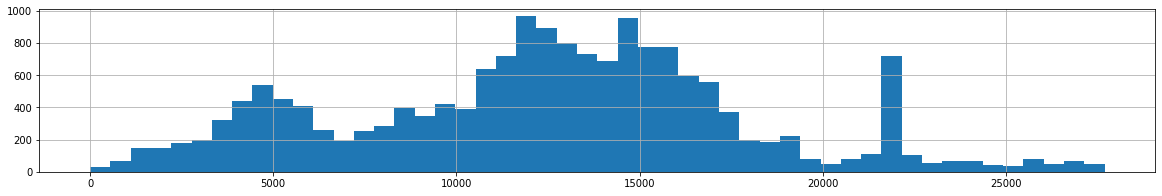

Среднее значение неотфильтрованных данных столбца cityCenters_nearest 14457.382376332114
Медианное значение неотфильтрованных данных столбца cityCenters_nearest 13266.0
Среднее значение отфильтрованных данных столбца cityCenters_nearest 12441.194069374927
Медианное значение отфильтрованных данных столбца cityCenters_nearest 12696.0
Среднее значение отфильтрованных по всем столбцам данных столбца cityCenters_nearest 13706.162720561757
Медианное значение отфильтрованных по всем столбцам данных столбца cityCenters_nearest 13527.5


In [31]:
describe('cityCenters_nearest')

Пик соответствует районам рядом с КАДом.

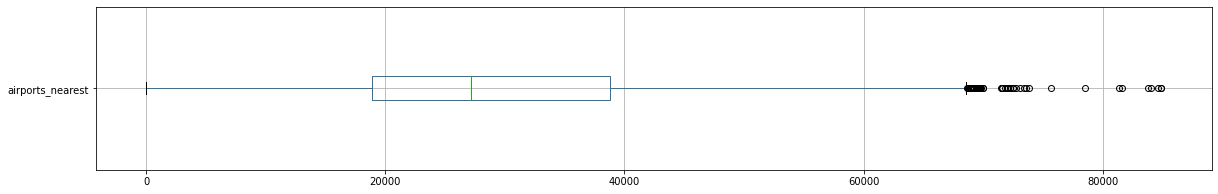

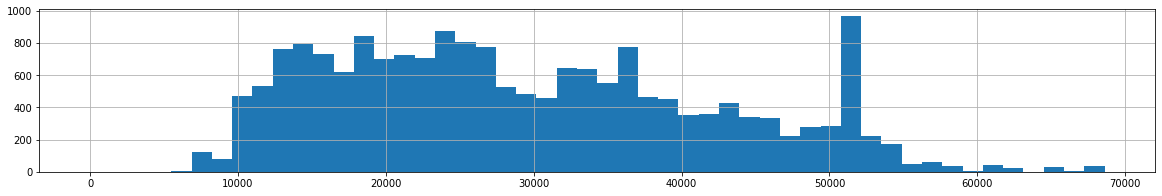

Среднее значение неотфильтрованных данных столбца airports_nearest 29532.891681247016
Медианное значение неотфильтрованных данных столбца airports_nearest 27179.0
Среднее значение отфильтрованных данных столбца airports_nearest 29403.276005105297
Медианное значение отфильтрованных данных столбца airports_nearest 27125.0
Среднее значение отфильтрованных по всем столбцам данных столбца airports_nearest 29350.25828231905
Медианное значение отфильтрованных по всем столбцам данных столбца airports_nearest 28967.5


In [32]:
describe('airports_nearest')

Большинство предложений находится в 26 км от аэропорта. 13 км от центра, значит большинство предложений где-то в районе Мурино.

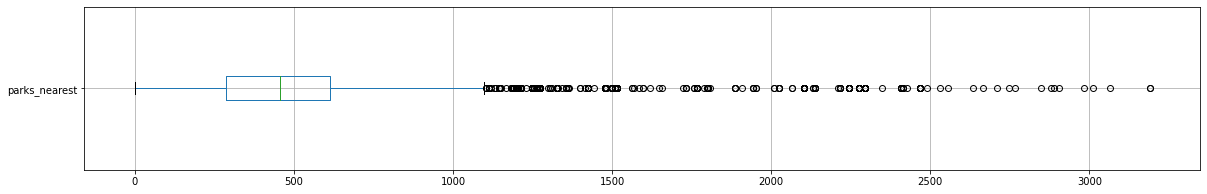

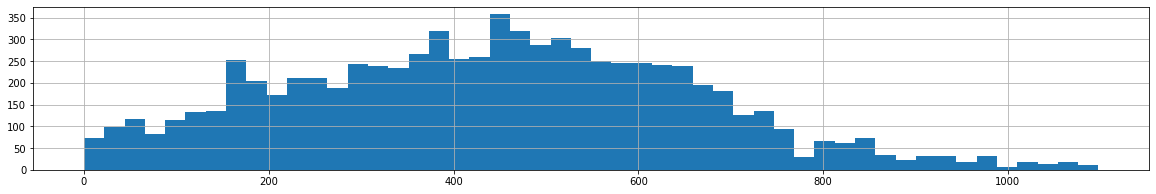

Среднее значение неотфильтрованных данных столбца parks_nearest 490.80455501918556
Медианное значение неотфильтрованных данных столбца parks_nearest 455.0
Среднее значение отфильтрованных данных столбца parks_nearest 440.2966636609558
Медианное значение отфильтрованных данных столбца parks_nearest 441.0
Среднее значение отфильтрованных по всем столбцам данных столбца parks_nearest 458.7722722722723
Медианное значение отфильтрованных по всем столбцам данных столбца parks_nearest 463.0


In [33]:
describe('parks_nearest')           

Нормальное рапределение, в среднем в районе 500 метров есть парк.

<div class="alert alert-info">
<b>По заданию нужно расмотреть 14 столбцов, выше 12 столбцов, ниже ещё 2 столбца</b> 
</div>

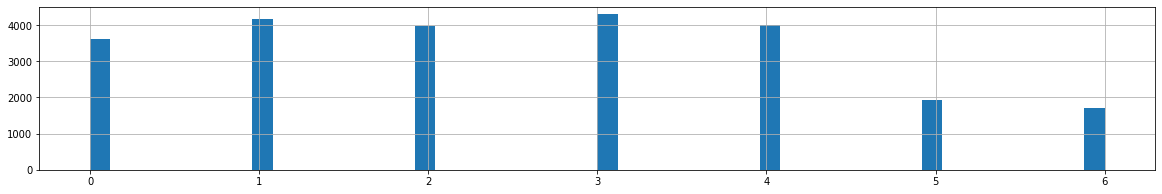

Среднее значение неотфильтрованных данных столбца day_of_exposition 2.5693067218026076
Медианное значение неотфильтрованных данных столбца day_of_exposition 3.0
Среднее значение неотфильтрованных данных столбца month_of_exposition 6.400101270095784
Медианное значение неотфильтрованных данных столбца month_of_exposition 6.0


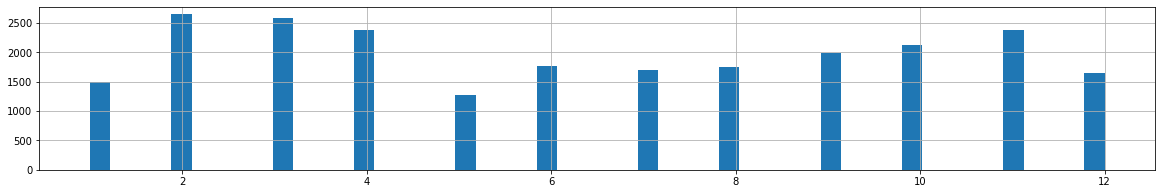

In [34]:
data['day_of_exposition'].hist(bins=50, figsize=(20, 3))
plt.show()
print('Среднее значение неотфильтрованных данных столбца', 'day_of_exposition', data['day_of_exposition'].mean())
print('Медианное значение неотфильтрованных данных столбца', 'day_of_exposition', data['day_of_exposition'].median())
data['month_of_exposition'].hist(bins=50, figsize=(20, 3))
print('Среднее значение неотфильтрованных данных столбца', 'month_of_exposition', data['month_of_exposition'].mean())
print('Медианное значение неотфильтрованных данных столбца', 'month_of_exposition', data['month_of_exposition'].median())

Пики выставления на продажу в феврале марте и ноябре. Выставляют чаще в рабочие дни, кроме понедельника.

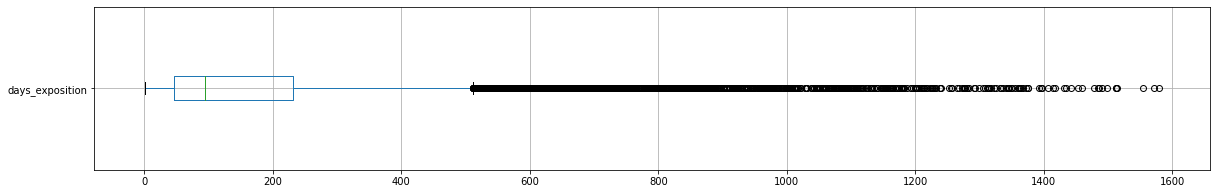

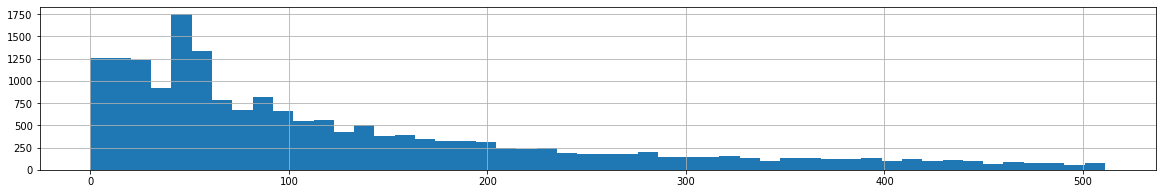

Среднее значение неотфильтрованных данных столбца days_exposition 181.08343893166975
Медианное значение неотфильтрованных данных столбца days_exposition 95.0
Среднее значение отфильтрованных данных столбца days_exposition 128.7503582992728
Медианное значение отфильтрованных данных столбца days_exposition 85.0
Среднее значение отфильтрованных по всем столбцам данных столбца days_exposition 122.33593574056002
Медианное значение отфильтрованных по всем столбцам данных столбца days_exposition 77.0


In [35]:
describe('days_exposition')

Обычно заявление до снятия находится на сайте 3 месяца. Похоже, что объявления которые продались менее чем за 80 и более чем за 180 можно расматривать как подозрительные, ввиду отличия от нормального распределения.

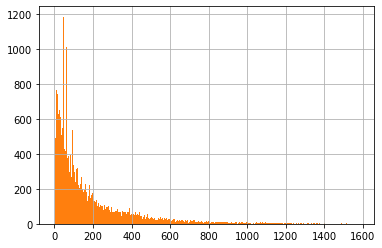

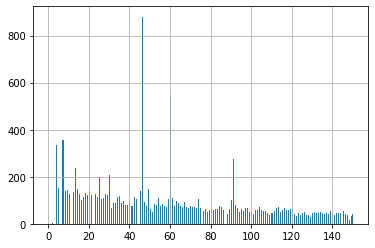

In [36]:
data[(data['days_exposition'] > 20)&(data['days_exposition'] < 100)]['days_exposition'].hist(bins=100)
data['days_exposition'].hist(bins=300)
plt.show()
data['days_exposition'].hist(bins=300, range=(0, 150))
plt.show()

In [37]:
data[(data['days_exposition'] > 50)&(data['days_exposition'] < 80)]['days_exposition'].median()

61.0

График обладает явными пиками в первой десятке дней и далее 45, 60, 90 дней, видимо алгоритм подбора объявлений специально предлагает их спустя эти интервалы дней. Объявления с временем больше 1000 явно необычно медленные. А значения меньше 10 дней - подозрительно быстрые.

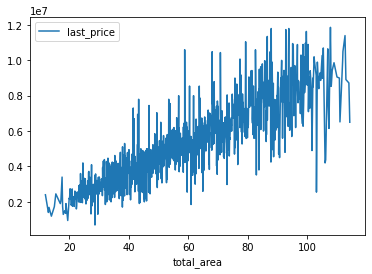

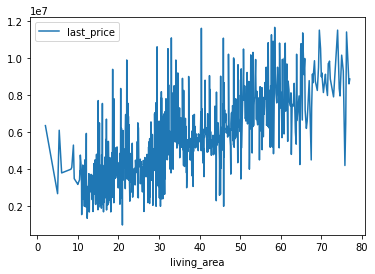

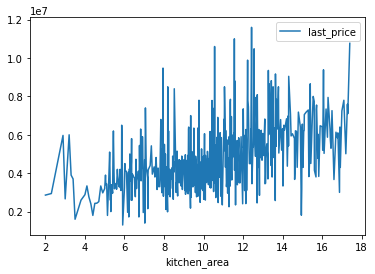

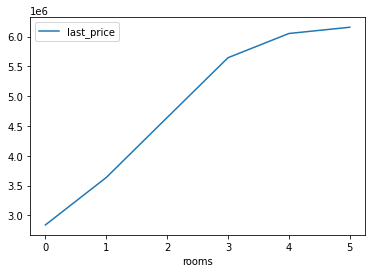

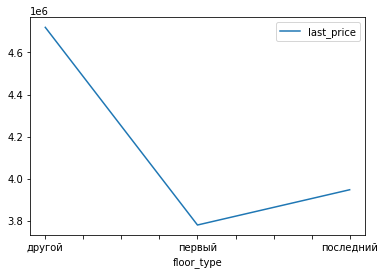

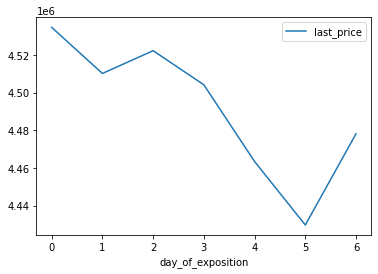

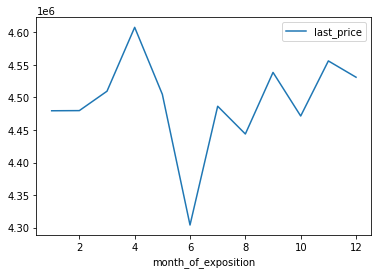

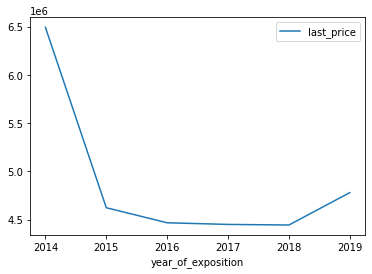

In [38]:
def plot_lines(col):
    datapl = pd.pivot_table(data[data['filtred'] == True], values='last_price', index=col, aggfunc='mean')
    datapl.plot()
    plt.show()
plot_lines('total_area')
plot_lines('living_area')
plot_lines('kitchen_area')
plot_lines('rooms')
plot_lines('floor_type')
plot_lines('day_of_exposition')
plot_lines('month_of_exposition')
plot_lines('year_of_exposition')

По приведенным данным явна положительная зависимость цены от общей площади, жилой площади и площади кухни. Так же видно, что дороже ценяться не первые и не последние этажи. Самые дешевые предложения - по пятницам в июне. После 2014 года квартиры подешевели, но цена с 2018 года начинает опять расти.

                     day_of_exposition  kitchen_area  last_price  living_area  \
day_of_exposition             1.000000      0.012341   -0.054530     0.055795   
kitchen_area                  0.012341      1.000000    0.443498     0.133927   
last_price                   -0.054530      0.443498    1.000000     0.457153   
living_area                   0.055795      0.133927    0.457153     1.000000   
month_of_exposition           0.034503     -0.055805   -0.052440    -0.046167   
rooms                         0.094449      0.015009    0.243506     0.862204   
total_area                    0.027247      0.376763    0.613151     0.869877   
year_of_exposition           -0.069375      0.025118   -0.082363    -0.065639   

                     month_of_exposition     rooms  total_area  \
day_of_exposition               0.034503  0.094449    0.027247   
kitchen_area                   -0.055805  0.015009    0.376763   
last_price                     -0.052440  0.243506    0.613151   
living

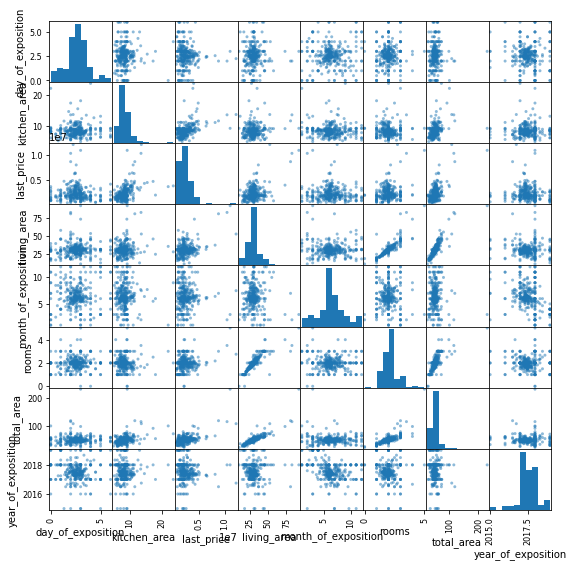

In [39]:
data_multi = data.pivot_table(index='locality_name', 
                              values=['total_area',
                                      'living_area',
                                      'kitchen_area',
                                      'rooms',
                                      'floor_type',
                                      'day_of_exposition',
                                      'month_of_exposition',
                                      'year_of_exposition',
                                      'last_price'
                                     ],
                              aggfunc='mean')
print(data_multi.corr())
pd.plotting.scatter_matrix(data_multi, figsize=(9, 9))
plt.show()

Больше всего на цену влияет общая площадь, на втором месте площадь кухни. Это подтверждает правильность предобработки данных.

In [40]:
loc_data = pd.pivot_table(data[data['filtred'] == True], values='price_per_square_meter', index='locality_name', aggfunc=['count', 'mean'])
display(loc_data.sort_values(by=("count", 'price_per_square_meter'), ascending=False).head(10))

display(pd.pivot_table(
                    data[data['filtred'] == True],
                    values='price_per_square_meter',
                    index='locality_name',
                    aggfunc='mean').sort_values(by='price_per_square_meter', ascending=False).head(10)
                   )

,count,mean
,price_per_square_meter,price_per_square_meter
locality_name,,
Санкт-Петербург,10095,191224.836720
Мурино,429,172366.018339
Кудрово,336,191859.703156
Всеволожск,336,128477.168630
Гатчина,263,121209.440506
посёлок Парголово,198,192332.203457
Выборг,195,98268.998141
посёлок Шушары,185,163847.898972


,price_per_square_meter
locality_name,
посёлок Лисий Нос,415056.818182
садовое товарищество Новая Ропша,250000.000000
Красное Село,214285.714286
посёлок Парголово,192332.203457
Кудрово,191859.703156
Санкт-Петербург,191224.836720
посёлок станции Корнево,188571.428571
деревня Мистолово,185710.859816
Пушкин,175087.753322


<AxesSubplot:xlabel='cityCenters_nearest_km'>

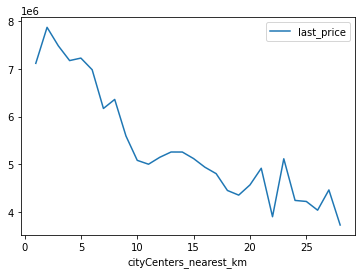

In [41]:
km_data = pd.pivot_table(
                         data[data['filtred'] == True],
                         values='last_price',
                         index='cityCenters_nearest_km',
                         aggfunc='mean'
                        )
km_data.sort_values(by='cityCenters_nearest_km', ascending=False).plot()

Цена квадратного метра ожидаемо падает с растоянием. При удалении от центра города цена квадратного метра падает вдвое.

### Общий вывод

Была проведена предобработка данных - преобразованны данные в соответствующие типы, значения-аномалии вычеркнуты из анализа (64% от общих данных).
Проведеный анализ данный выявил логичную зависимость цены от общей площади недвижимости, что подтверждает правильность предобработки данных.

По проведенным исследованиям найдены средняя цена квадратного метра в Санкт-Петербурге.

Найдены значения количества дней которые "висели" на сайте, которые можно считать слишком быстрыми (менее 10 суток) и слишком долгими (более 1000).

Проведены оценки самых дорогих квадратных метров - вилка по цене (172366р - 415056р), а также по проведеному исследованию выявлено, при удалении от центра города цена квадратного метра падает вдвое.